In [85]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
%matplotlib inline

In [86]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

In [87]:
PITall_data = np.concatenate((PITdf['DNI'].values.reshape(-1,1), BUTdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), NCSdf['DNI'].values.reshape(-1,1), \
                           KITdf['DNI'].values.reshape(-1,1), \
                           PITdf['day_x'].values.reshape(-1,1), PITdf['day_y'].values.reshape(-1,1), \
                           PITdf['time_x'].values.reshape(-1,1), PITdf['time_y'].values.reshape(-1,1)),axis = 1)


In [88]:
BUTall_data = np.concatenate((BUTdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           NCSdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           YGTdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), GREdf['DNI'].values.reshape(-1,1), \
                           STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['day_x'].values.reshape(-1,1), BUTdf['day_y'].values.reshape(-1,1), \
                           BUTdf['time_x'].values.reshape(-1,1), BUTdf['time_y'].values.reshape(-1,1)),axis = 1)


In [89]:
WASall_data = np.concatenate((WASdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           MGTdf['DNI'].values.reshape(-1,1), CBGdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           WASdf['day_x'].values.reshape(-1,1), WASdf['day_y'].values.reshape(-1,1), \
                           WASdf['time_x'].values.reshape(-1,1), WASdf['time_y'].values.reshape(-1,1)),axis = 1)


In [90]:
GREall_data = np.concatenate((GREdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), JONdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           GREdf['day_x'].values.reshape(-1,1), GREdf['day_y'].values.reshape(-1,1), \
                           GREdf['time_x'].values.reshape(-1,1), GREdf['time_y'].values.reshape(-1,1)),axis = 1)


In [91]:
test_length = 365 * 48 * 1
train_length = 365 * 48 * 5
PITall_data = PITall_data[:(train_length + test_length), :]
BUTall_data = BUTall_data[:(train_length + test_length), :]
WASall_data = WASall_data[:(train_length + test_length), :]
GREall_data = GREall_data[:(train_length + test_length), :]



In [92]:
PITinputs = np.concatenate((PITall_data[3:-3,:], PITall_data[2:-4,:], PITall_data[1:-5,:], PITall_data[:-6,:]), axis = 1)
PITtargets = PITall_data[6:,0]

BUTinputs = np.concatenate((BUTall_data[3:-3,:], BUTall_data[2:-4,:], BUTall_data[1:-5,:], BUTall_data[:-6,:]), axis = 1)
BUTtargets = BUTall_data[6:,0]

WASinputs = np.concatenate((WASall_data[3:-3,:], WASall_data[2:-4,:], WASall_data[1:-5,:], WASall_data[:-6,:]), axis = 1)
WAStargets = WASall_data[6:,0]

GREinputs = np.concatenate((GREall_data[3:-3,:], GREall_data[2:-4,:], GREall_data[1:-5,:], GREall_data[:-6,:]), axis = 1)
GREtargets = GREall_data[6:,0]


In [93]:
PIT_X_train = PITinputs[:train_length,:]
PIT_y_train = PITtargets[:train_length]

PIT_X_test = PITinputs[train_length:,:]
PIT_y_test = PITtargets[train_length:]

BUT_X_train = BUTinputs[:train_length,:]
BUT_y_train = BUTtargets[:train_length]

BUT_X_test = BUTinputs[train_length:,:]
BUT_y_test = BUTtargets[train_length:]

WAS_X_train = WASinputs[:train_length,:]
WAS_y_train = WAStargets[:train_length]

WAS_X_test = WASinputs[train_length:,:]
WAS_y_test = WAStargets[train_length:]

GRE_X_train = GREinputs[:train_length,:]
GRE_y_train = GREtargets[:train_length]

GRE_X_test = GREinputs[train_length:,:]
GRE_y_test = GREtargets[train_length:]


In [94]:
PITscaler = MinMaxScaler()
BUTscaler = MinMaxScaler()
WASscaler = MinMaxScaler()
GREscaler = MinMaxScaler()

PITscaler.fit(PIT_X_train)
PIT_X_train_normalized = PITscaler.transform(PIT_X_train)
PIT_X_test_normalized = PITscaler.transform(PIT_X_test)

BUTscaler.fit(BUT_X_train)
BUT_X_train_normalized = BUTscaler.transform(BUT_X_train)
BUT_X_test_normalized = BUTscaler.transform(BUT_X_test)

WASscaler.fit(WAS_X_train)
WAS_X_train_normalized = WASscaler.transform(WAS_X_train)
WAS_X_test_normalized = WASscaler.transform(WAS_X_test)

GREscaler.fit(GRE_X_train)
GRE_X_train_normalized = GREscaler.transform(GRE_X_train)
GRE_X_test_normalized = GREscaler.transform(GRE_X_test)

In [95]:
PIT_X_train_normalized = torch.from_numpy(PIT_X_train_normalized).float()
PIT_y_train = torch.squeeze(torch.from_numpy(PIT_y_train).float())
PIT_X_test_normalized = torch.from_numpy(PIT_X_test_normalized).float()

BUT_X_train_normalized = torch.from_numpy(BUT_X_train_normalized).float()
BUT_y_train = torch.squeeze(torch.from_numpy(BUT_y_train).float())
BUT_X_test_normalized = torch.from_numpy(BUT_X_test_normalized).float()

WAS_X_train_normalized = torch.from_numpy(WAS_X_train_normalized).float()
WAS_y_train = torch.squeeze(torch.from_numpy(WAS_y_train).float())
WAS_X_test_normalized = torch.from_numpy(WAS_X_test_normalized).float()

GRE_X_train_normalized = torch.from_numpy(GRE_X_train_normalized).float()
GRE_y_train = torch.squeeze(torch.from_numpy(GRE_y_train).float())
GRE_X_test_normalized = torch.from_numpy(GRE_X_test_normalized).float()



In [96]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))


In [97]:
PITnet = Net(PIT_X_train.shape[1])
BUTnet = Net(BUT_X_train.shape[1])
WASnet = Net(WAS_X_train.shape[1])
GREnet = Net(GRE_X_train.shape[1])


In [98]:
PITcriterion = nn.MSELoss()
PIToptimizer = optim.Adam(PITnet.parameters(), lr = 0.01)

BUTcriterion = nn.MSELoss()
BUToptimizer = optim.Adam(BUTnet.parameters(), lr = 0.01)

WAScriterion = nn.MSELoss()
WASoptimizer = optim.Adam(WASnet.parameters(), lr = 0.01)

GREcriterion = nn.MSELoss()
GREoptimizer = optim.Adam(GREnet.parameters(), lr = 0.01)

In [99]:
for epoch in range(1000):
    
    y_pred = PITnet(PIT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = PITcriterion(y_pred, PIT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    PIToptimizer.zero_grad()
    
    train_loss.backward()
    
    PIToptimizer.step()

tensor(117713.8906, grad_fn=<MseLossBackward>)
tensor(20945.7520, grad_fn=<MseLossBackward>)
tensor(19289.9863, grad_fn=<MseLossBackward>)
tensor(16811.8926, grad_fn=<MseLossBackward>)
tensor(16206.6592, grad_fn=<MseLossBackward>)
tensor(15930.1631, grad_fn=<MseLossBackward>)
tensor(15727.8379, grad_fn=<MseLossBackward>)
tensor(15588.5117, grad_fn=<MseLossBackward>)
tensor(15469.8906, grad_fn=<MseLossBackward>)
tensor(15379.1074, grad_fn=<MseLossBackward>)


In [100]:
for epoch in range(1000):
    
    y_pred = BUTnet(BUT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = BUTcriterion(y_pred, BUT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    BUToptimizer.zero_grad()
    
    train_loss.backward()
    
    BUToptimizer.step()

tensor(114670.4766, grad_fn=<MseLossBackward>)
tensor(21324.9941, grad_fn=<MseLossBackward>)
tensor(20277.9922, grad_fn=<MseLossBackward>)
tensor(20007.3750, grad_fn=<MseLossBackward>)
tensor(19596.5977, grad_fn=<MseLossBackward>)
tensor(17982.1348, grad_fn=<MseLossBackward>)
tensor(17146.3145, grad_fn=<MseLossBackward>)
tensor(16731.9980, grad_fn=<MseLossBackward>)
tensor(16532.1016, grad_fn=<MseLossBackward>)
tensor(16410.4844, grad_fn=<MseLossBackward>)


In [101]:
for epoch in range(1000):
    
    y_pred = WASnet(WAS_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = WAScriterion(y_pred, WAS_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    WASoptimizer.zero_grad()
    
    train_loss.backward()
    
    WASoptimizer.step()

tensor(118897.4688, grad_fn=<MseLossBackward>)
tensor(20861.4883, grad_fn=<MseLossBackward>)
tensor(19696.6777, grad_fn=<MseLossBackward>)
tensor(18749.9062, grad_fn=<MseLossBackward>)
tensor(18280.3398, grad_fn=<MseLossBackward>)
tensor(17996.0723, grad_fn=<MseLossBackward>)
tensor(17569.0312, grad_fn=<MseLossBackward>)
tensor(16609.5762, grad_fn=<MseLossBackward>)
tensor(16135.4600, grad_fn=<MseLossBackward>)
tensor(15878.8887, grad_fn=<MseLossBackward>)


In [102]:
for epoch in range(1000):
    
    y_pred = GREnet(GRE_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = GREcriterion(y_pred, GRE_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    GREoptimizer.zero_grad()
    
    train_loss.backward()
    
    GREoptimizer.step()

tensor(118985.8672, grad_fn=<MseLossBackward>)
tensor(21124.8457, grad_fn=<MseLossBackward>)
tensor(20096.3301, grad_fn=<MseLossBackward>)
tensor(19774.4316, grad_fn=<MseLossBackward>)
tensor(19639.0645, grad_fn=<MseLossBackward>)
tensor(18077.3027, grad_fn=<MseLossBackward>)
tensor(16640.9297, grad_fn=<MseLossBackward>)
tensor(15955.3955, grad_fn=<MseLossBackward>)
tensor(15707.5645, grad_fn=<MseLossBackward>)
tensor(15567.7764, grad_fn=<MseLossBackward>)


In [103]:
PIT_y_test_pred = PITnet(PIT_X_test_normalized)
PIT_y_test_pred_np = PIT_y_test_pred.detach().numpy()[:,0]

BUT_y_test_pred = BUTnet(BUT_X_test_normalized)
BUT_y_test_pred_np = BUT_y_test_pred.detach().numpy()[:,0]

WAS_y_test_pred = WASnet(WAS_X_test_normalized)
WAS_y_test_pred_np = WAS_y_test_pred.detach().numpy()[:,0]

GRE_y_test_pred = GREnet(GRE_X_test_normalized)
GRE_y_test_pred_np = GRE_y_test_pred.detach().numpy()[:,0]
print(PIT_X_test_normalized[5:27])

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.8044, 0.8967],
        [0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.8536, 0.8536],
        [0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.8967, 0.8044],
        ...,
        [0.0252, 0.0000, 0.0000,  ..., 0.9999, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.4347, 0.0043],
        [0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.3706, 0.0170]])


Avg error: 0.8614493415510054
Avg absolute error: 62.09280585291976
Err Std: 123.62054247954407
Abs Err Std: 106.89838202337972
Min Err: -804.6217956542969
Max Err: 853.6473999023438


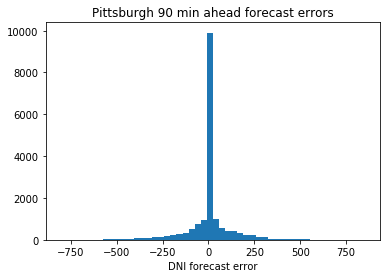

In [120]:
PITerr = np.subtract(PIT_y_test_pred_np, PIT_y_test)
plt.hist(PITerr, bins = 50)
plt.title('Pittsburgh 90 min ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(PITerr)
abserr = np.abs(PITerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(PITerr)
min_err = np.min(PITerr)
max_err = np.max(PITerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 4.759554569415158
Avg absolute error: 62.78164473741007
Err Std: 123.17926357969539
Abs Err Std: 106.08604724373954
Min Err: -739.9806442260742
Max Err: 804.6195068359375


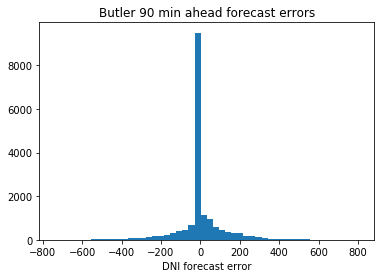

In [121]:
BUTerr = np.subtract(BUT_y_test_pred_np, BUT_y_test)
plt.hist(BUTerr, bins = 50)
plt.title('Butler 90 min ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(BUTerr)
abserr = np.abs(BUTerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(BUTerr)
min_err = np.min(BUTerr)
max_err = np.max(BUTerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 4.28052220471519
Avg absolute error: 62.793141887105804
Err Std: 121.95374644761229
Abs Err Std: 104.63297986246673
Min Err: -725.0589447021484
Max Err: 794.6630859375


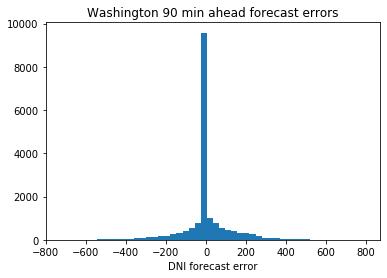

In [122]:
WASerr = np.subtract(WAS_y_test_pred_np, WAS_y_test)
plt.hist(WASerr, bins = 50)
plt.title('Washington 90 min ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(WASerr)
abserr = np.abs(WASerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(WASerr)
min_err = np.min(WASerr)
max_err = np.max(WASerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 6.1964206801585116
Avg absolute error: 63.583824662674814
Err Std: 125.56231163584384
Abs Err Std: 108.44992841790393
Min Err: -775.8397254943848
Max Err: 804.4224243164062


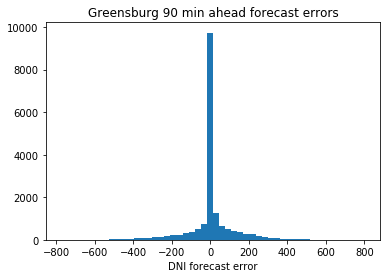

In [123]:
GREerr = np.subtract(GRE_y_test_pred_np, GRE_y_test)
plt.hist(GREerr, bins = 50)
plt.title('Greensburg 90 min ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(GREerr)
abserr = np.abs(GREerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(GREerr)
min_err = np.min(GREerr)
max_err = np.max(GREerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

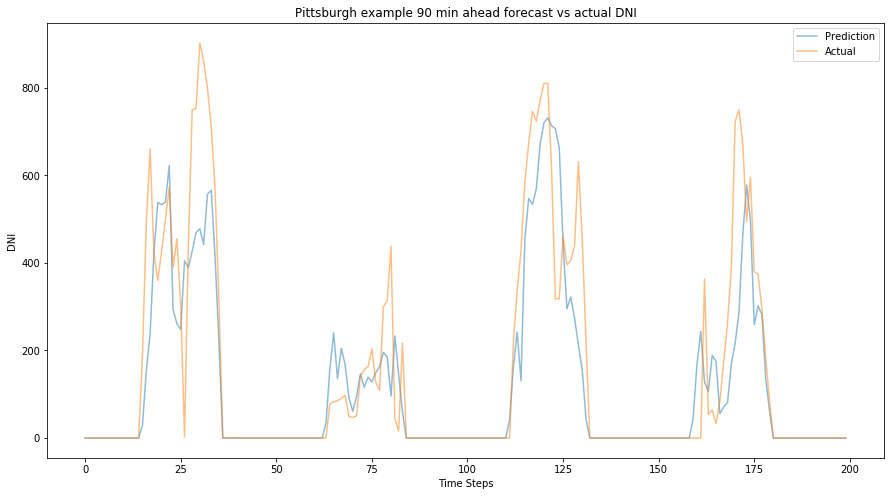

In [124]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(PIT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(PIT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Pittsburgh example 90 min ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

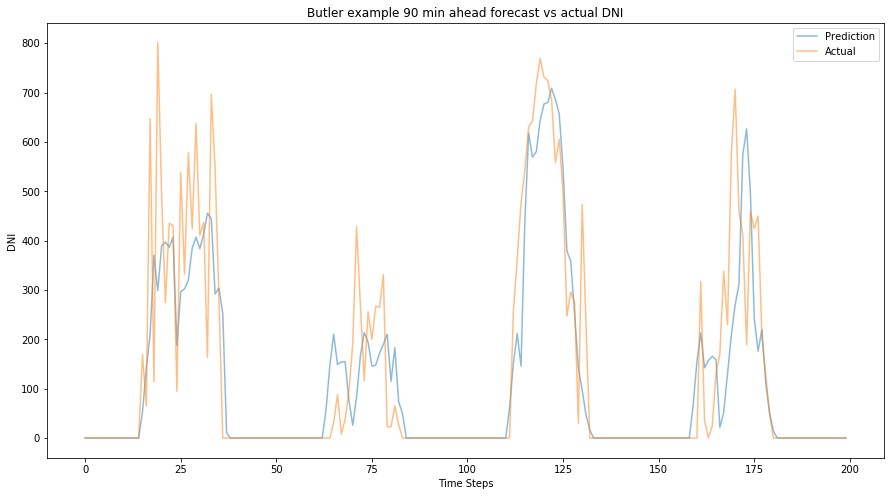

In [125]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(BUT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(BUT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Butler example 90 min ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

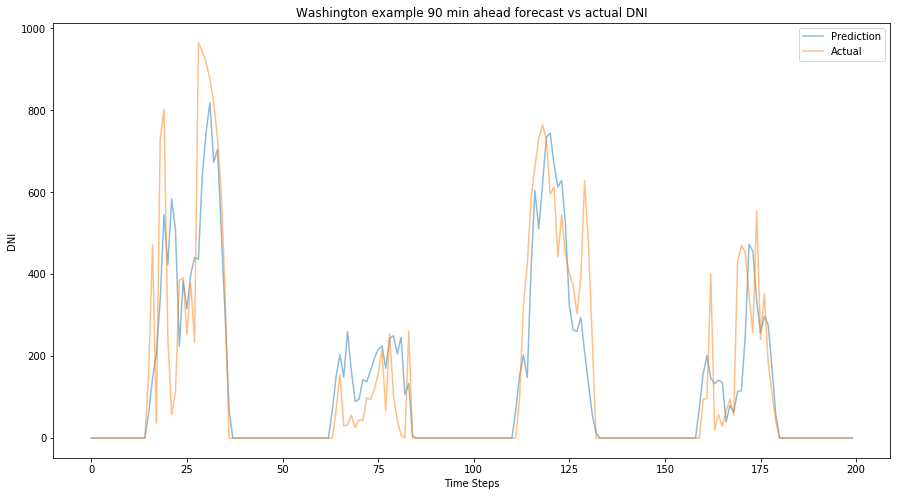

In [126]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(WAS_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(WAS_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Washington example 90 min ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

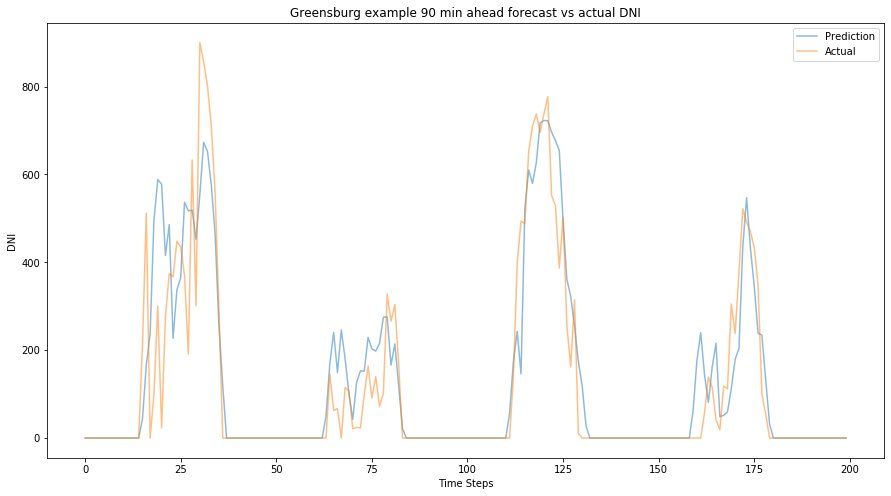

In [127]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(GRE_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(GRE_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Greensburg example 90 min ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

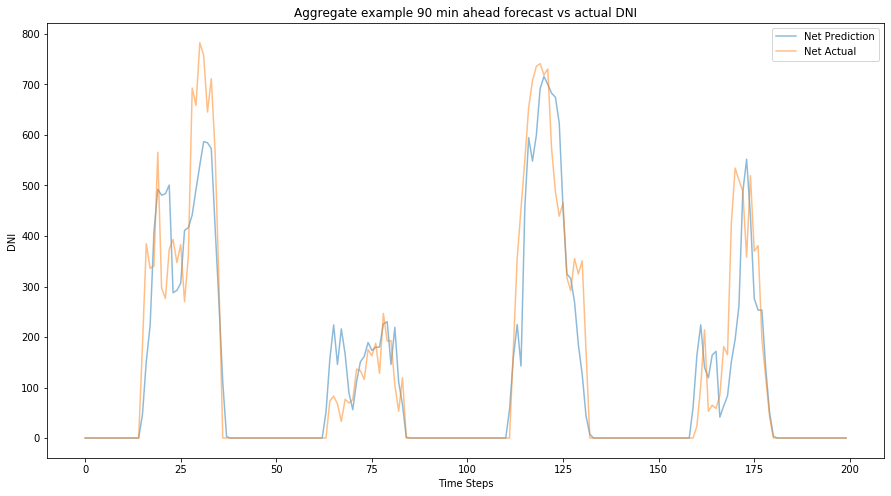

In [129]:
net_prediction = (0.25 * PIT_y_test_pred_np) + (0.25 * BUT_y_test_pred_np) + (0.25 * WAS_y_test_pred_np) + (0.25 * GRE_y_test_pred_np)
net_actual = (0.25 * PIT_y_test) + (0.25 * BUT_y_test) + (0.25 * WAS_y_test) + (0.25 * GRE_y_test)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(net_prediction[start:(start+window)],alpha = 0.5)
plt.plot(net_actual[start:(start+window)], alpha = 0.5)
plt.legend(['Net Prediction', 'Net Actual'])
plt.title('Aggregate example 90 min ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()



NET Avg error: 4.024486684565891
NET Avg absolute error: 45.49460395234736
NET Err Std: 88.20442075106023
NET Abs Err Std: 75.6733595416734
NET min err: -537.9913635253906
NET max err: 717.670166015625


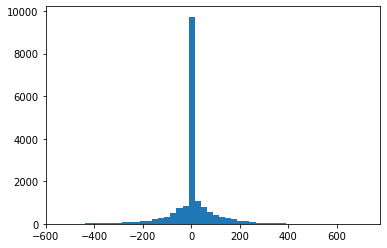

In [128]:
net_err = np.subtract(net_prediction, net_actual)
plt.hist(net_err, bins = 50)
mean_err = np.mean(net_err)
abserr = np.abs(net_err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(net_err)
min_err = np.min(net_err)
max_err = np.max(net_err)
print('NET Avg error: ' + str(mean_err))
print('NET Avg absolute error: ' + str(mean_abs_err))
print('NET Err Std: ' + str(std_err))
print('NET Abs Err Std: ' + str(std_abs_err))
print('NET min err: ' + str(min_err))
print('NET max err: ' + str(max_err))


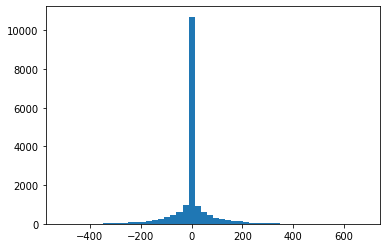

Avg half_hour_ROC: 0.0
Avg absolute half_hour_ROC: 35.97541826072061
Half_hour_ROC Std: 74.28596411050255
Abs half_hour_ROC Std: 64.99364387994476


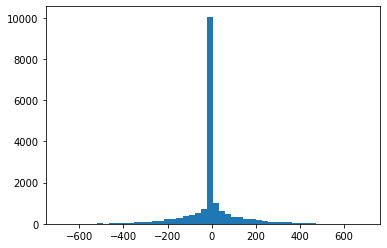

Avg hour_ROC: 0.0
Avg absolute hour_ROC: 55.80807446322522
Hour_ROC Std: 111.4511265742264
Abs Hour_ROC Std: 96.47182199674337


In [114]:
half_hour_ROC = net_actual[1:] - net_actual[:-1]
hour_ROC = net_actual[2:] - net_actual[:-2]
plt.hist(half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(half_hour_ROC)
abs_half_hour_ROC = np.abs(half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(half_hour_ROC)
print('Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))

plt.hist(hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(hour_ROC)
abs_hour_ROC = np.abs(hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(hour_ROC)
print('Avg hour_ROC: ' + str(mean_hour_ROC))
print('Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('Hour_ROC Std: ' + str(std_hour_ROC))
print('Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))